# **TFG Manuel García González: Modelo BERT para Text Classification**

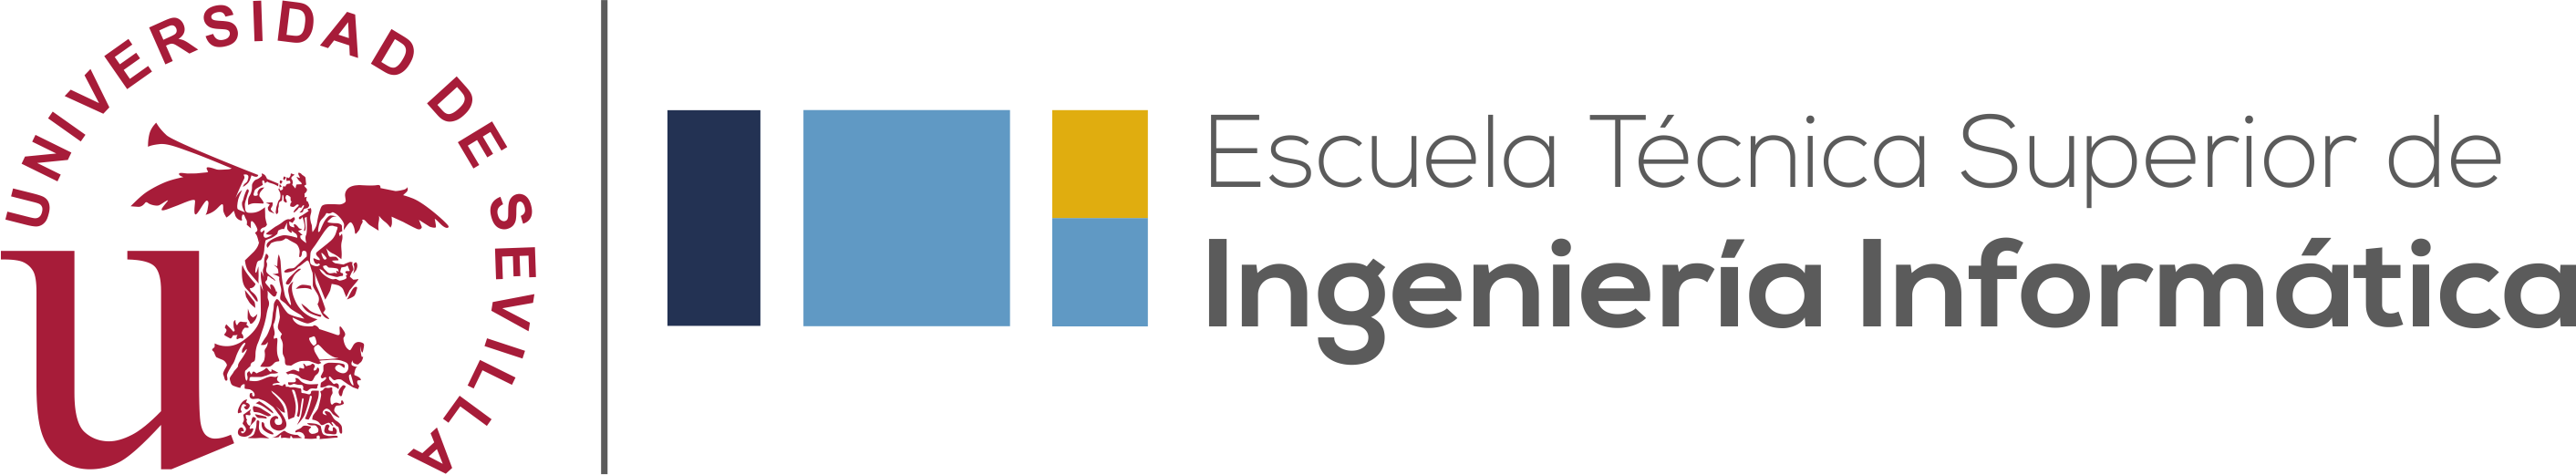

### **Importante: No ejecutar el notebook.**

Como se comentaba en las conclusiones del notebook de preentrenamiento del Distilbert, en ese avance se ha llevado a cabo de forma similar el entrenamiento del modelo BERT, en base al dataset "imdb". Este modelo, más contrastado, también presenta características especiales:

El modelo BERT (Pre-training of Deep Bidirectional Transformers for Language Understanding) fue propuesto por Jacob Devlin, Ming-Wei Chang, Kenton Lee y Kristina Toutanova. Se trata de un transformador bidireccional preentrenado mediante una combinación de objetivo de modelado del lenguaje enmascarado y predicción de la siguiente frase en un gran corpus que comprende el Toronto Book Corpus y Wikipedia. Sus características más destacables son:


*   BERT es un modelo con incrustaciones de posición absoluta, por lo que normalmente se aconseja rellenar las entradas por la derecha en lugar de por la izquierda.

* BERT se entrenó con los objetivos de modelado del lenguaje enmascarado (MLM) y predicción de la siguiente frase (NSP). Es eficiente en la predicción de tokens enmascarados y en NLU en general, pero no es óptimo para la generación de texto.

* Corrompe las entradas utilizando enmascaramiento aleatorio, más concretamente, durante el preentrenamiento, un porcentaje determinado de tokens (normalmente el 15%) se enmascara mediante:

  * Un token de enmascaramiento especial con una probabilidad de 0,8
  * Un testigo aleatorio distinto del enmascarado, con una probabilidad del 0,1
  * El mismo token con probabilidad 0,1

* El modelo debe predecir la frase original, pero tiene un segundo objetivo: las entradas son dos frases A y B (con un token de separación entre ellas). Con una probabilidad del 50%, las frases son consecutivas en el corpus, en el 50% restante no están relacionadas. El modelo debe predecir si las frases son consecutivas o no.

Por ende, se ha comenzado el entrenamiento del modelo, siguiendo la esquemática anterior.



In [ ]:
pip install transformers

In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from transformers import pipeline

In [ ]:
pip install datasets evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset

imdb = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
imdb["test"][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_imdb = imdb.map(preprocess_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "google-bert/bert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="ManuGG/Bert_textclass_MGG",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["train"],
    eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.214800,0.174493,0.934880


Epoch,Training Loss,Validation Loss,Accuracy
1,0.214800,0.174493,0.934880
2,0.135900,0.227451,0.938320


TrainOutput(global_step=3126, training_loss=0.19669770431762618, metrics={'train_runtime': 5936.4451, 'train_samples_per_second': 8.423, 'train_steps_per_second': 0.527, 'total_flos': 1.302353679597312e+16, 'train_loss': 0.19669770431762618, 'epoch': 2.0})

In [ ]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/ManuGG/Bert_textclass_MGG/commit/73a721958a297c05a769aec11939c8e3ba9f40e9', commit_message='End of training', commit_description='', oid='73a721958a297c05a769aec11939c8e3ba9f40e9', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
text = "Incredible film"

In [ ]:
from transformers import pipeline

classifier1 = pipeline("sentiment-analysis", model="ManuGG/Bert_textclass_MGG")
classifier2 = pipeline("sentiment-analysis", model="google-bert/bert-base-uncased")

prompt1 = classifier1(text)
prompt2 = classifier2(text)

print(prompt1)
print(prompt2)

config.json:   0%|          | 0.00/859 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9906144142150879}]
[{'label': 'LABEL_0', 'score': 0.6614636182785034}]


**Los resultados obtenidos durante el entrenamiento del modelo BERT en base al conjunto de datos IMDB parecen ser bastante prometedores. El modelo ha mostrado una capacidad efectiva para clasificar revisiones de películas como positivas o negativas, similar al desempeño observado con DistilBERT.**

**Tras el entrenamiento, se ha procedido a evaluar el rendimiento de ambos modelos (BERT y DistilBERT) utilizando varias métricas de evaluación. Estas métricas incluyen precisión, recuperación y F1-score, proporcionando una visión completa de la capacidad de los modelos para identificar correctamente la polaridad de las revisiones de películas.**